# VAE example

In [3]:
import os
import numpy as np
from numpy.linalg import norm
from matplotlib import pyplot as plt
from torchvision.utils import make_grid
import torch
from utils import *

# For LaTeX in matplotlib figures
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device =", device)

device = cuda


### Load dataset

In [8]:
dataset = 'mnist'  # 'celeba'
n_samples = 8  # Batch size

# Load target images (from test dataset)
kwargs = {'num_workers': 1, 'pin_memory': True} if torch.cuda.is_available() else {}
test_loader = load_dataset(dataset, n_samples, kwargs)[1]
x_target = next(iter(test_loader))[0].to(device)
x_size = x_target.size()[1:]  # Image shape
n_pixels = x_target[0].nelement()  # Total number of pixels

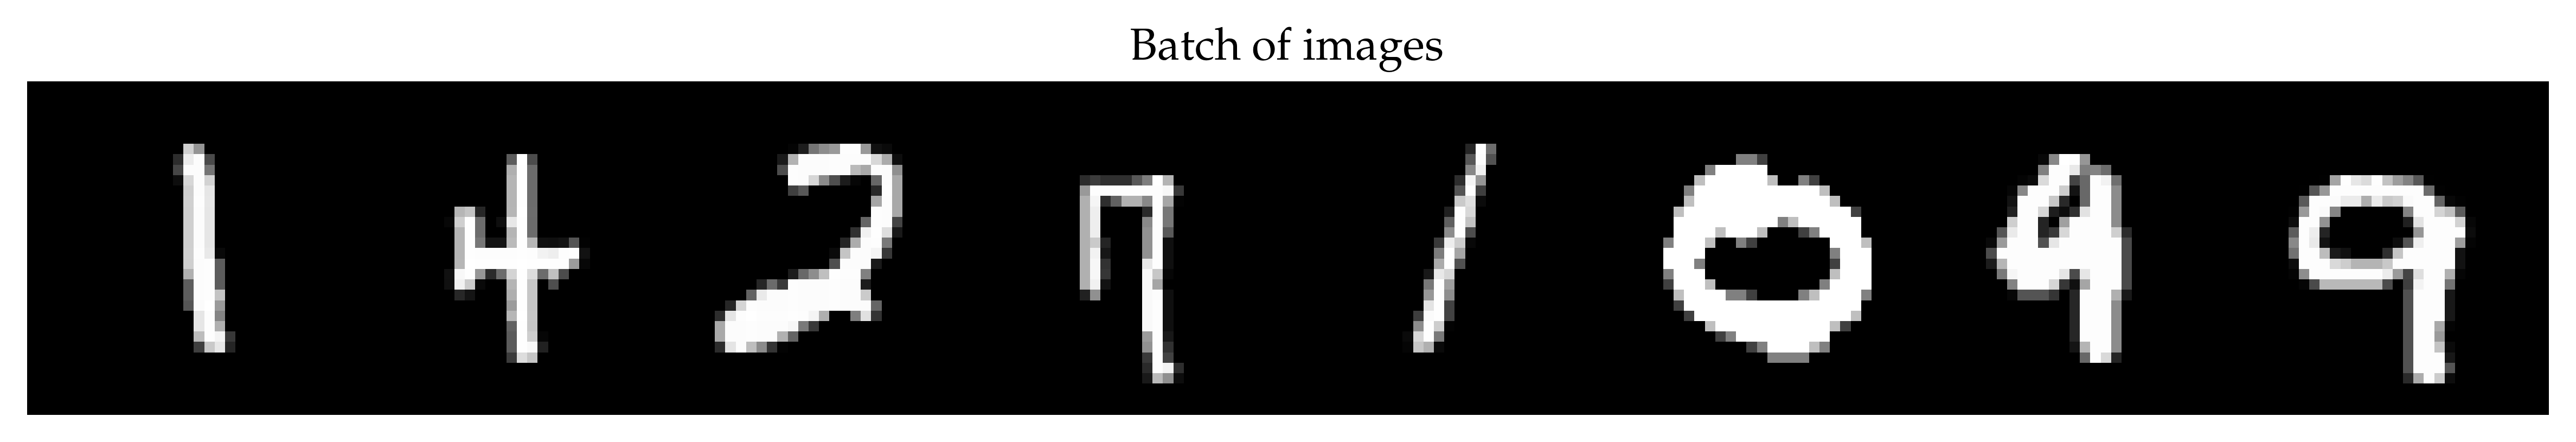

In [11]:
show_image = make_grid(x_target.cpu(), nrow=8).permute(1,2,0)
plt.figure(figsize=(12,12), dpi=500)
plt.imshow(show_image);
plt.title('Batch of images')
plt.axis('off');

### Load pretrained model

In [12]:
models_folder = 'pretrained_models'
model = 'VAEfc_MNIST_zdim8_dvae15_ELU'  # MNIST
#model = 'ConvVAE_CelebA_zdim64_dvae15_ELU'  # CelebA

model_path = os.path.join(models_folder, model)
vae = load_vae_model(model_path, device=device)
vae.eval()
vae.freeze()

### Some reconstructions: $\hat x = Dec(Enc(x))$

In [15]:
mu_z, sigma_z = vae.encoder(x_target)
x_reconst, gamma = vae.decoder(mu_z)
print(gamma)

Parameter containing:
tensor([0.1100], device='cuda:0')


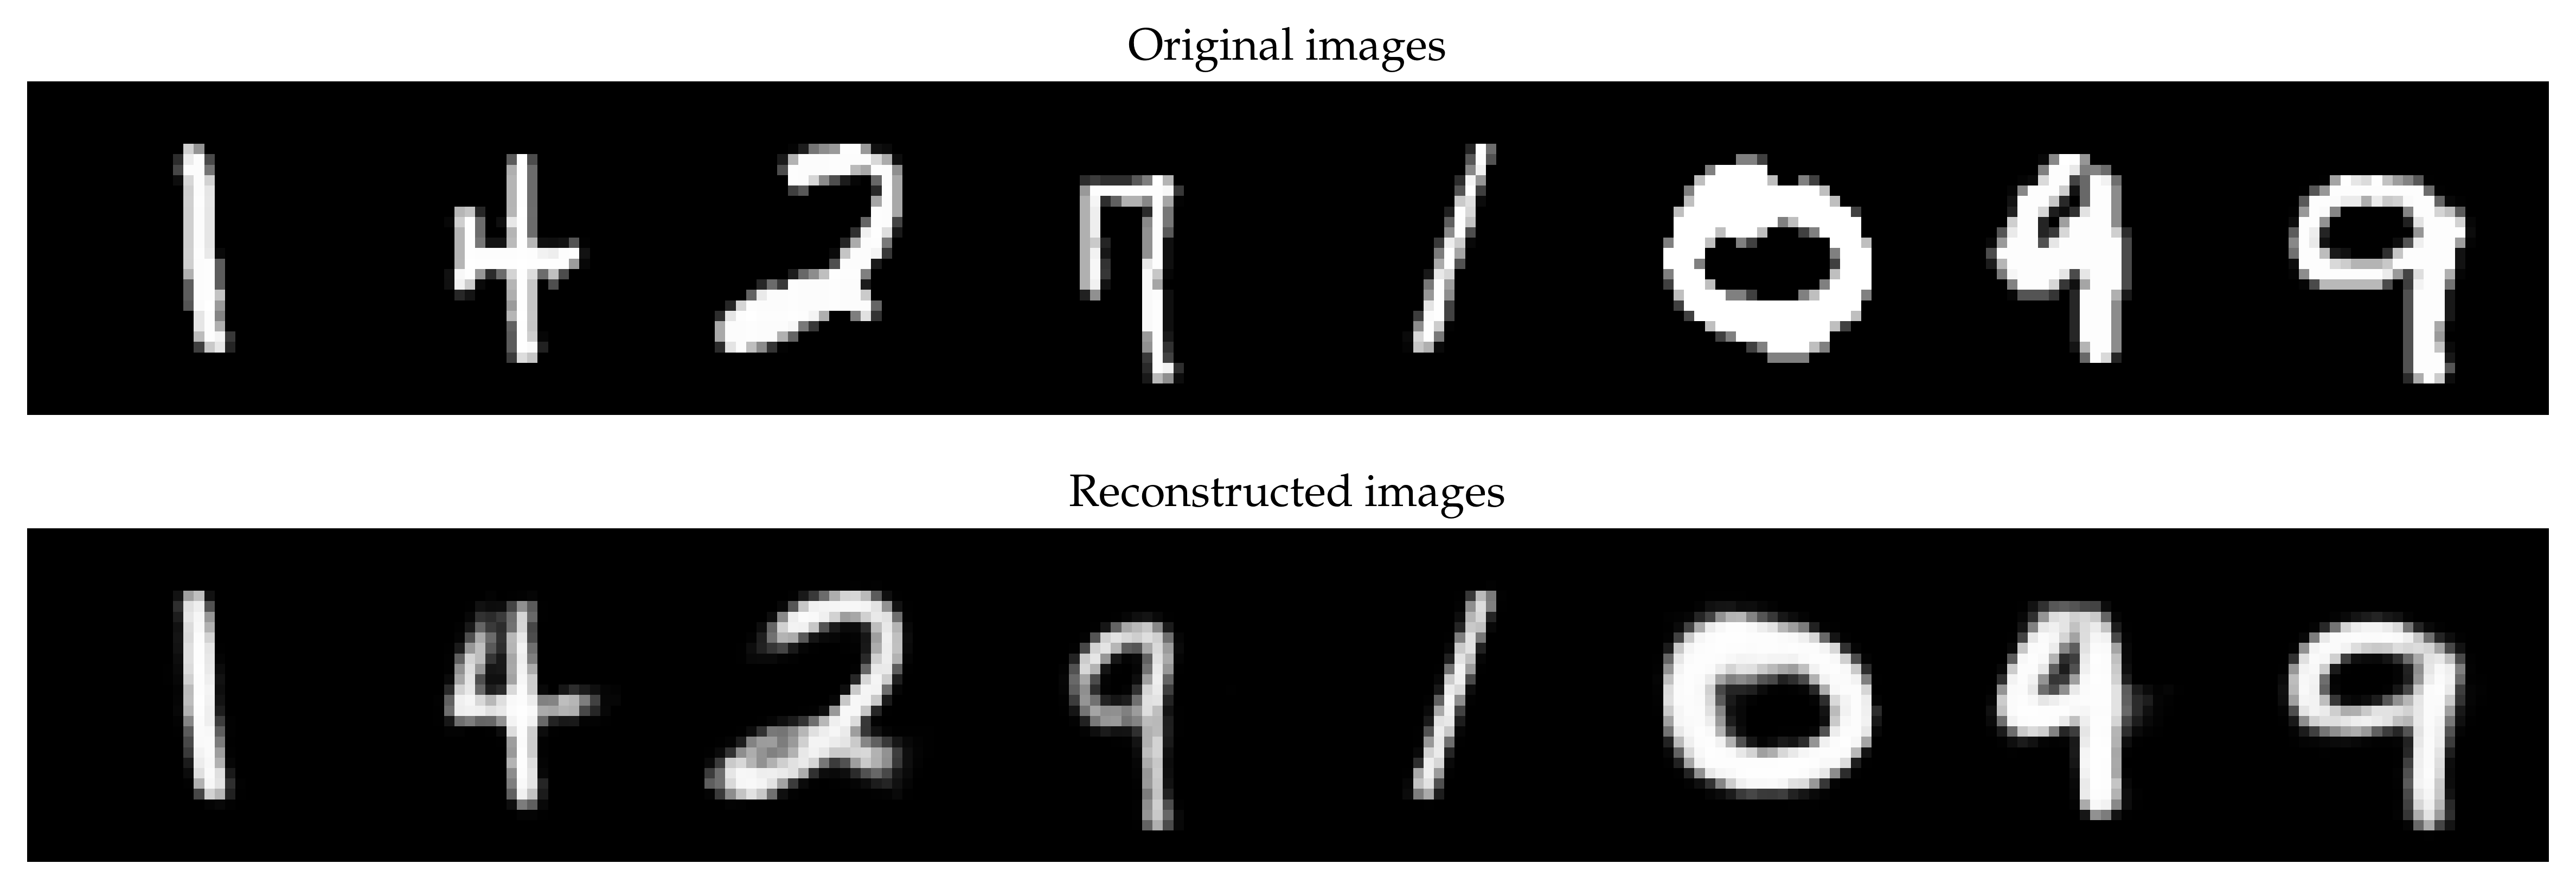

In [17]:
show_image2 = make_grid(x_reconst.cpu(), nrow=8).permute(1,2,0)
plt.figure(figsize=(12,4), dpi=500)
plt.subplot(2,1,1); plt.imshow(show_image); plt.title('Original images'); plt.axis('off');
plt.subplot(2,1,2); plt.imshow(show_image2); plt.title('Reconstructed images'); plt.axis('off');

### Random samples

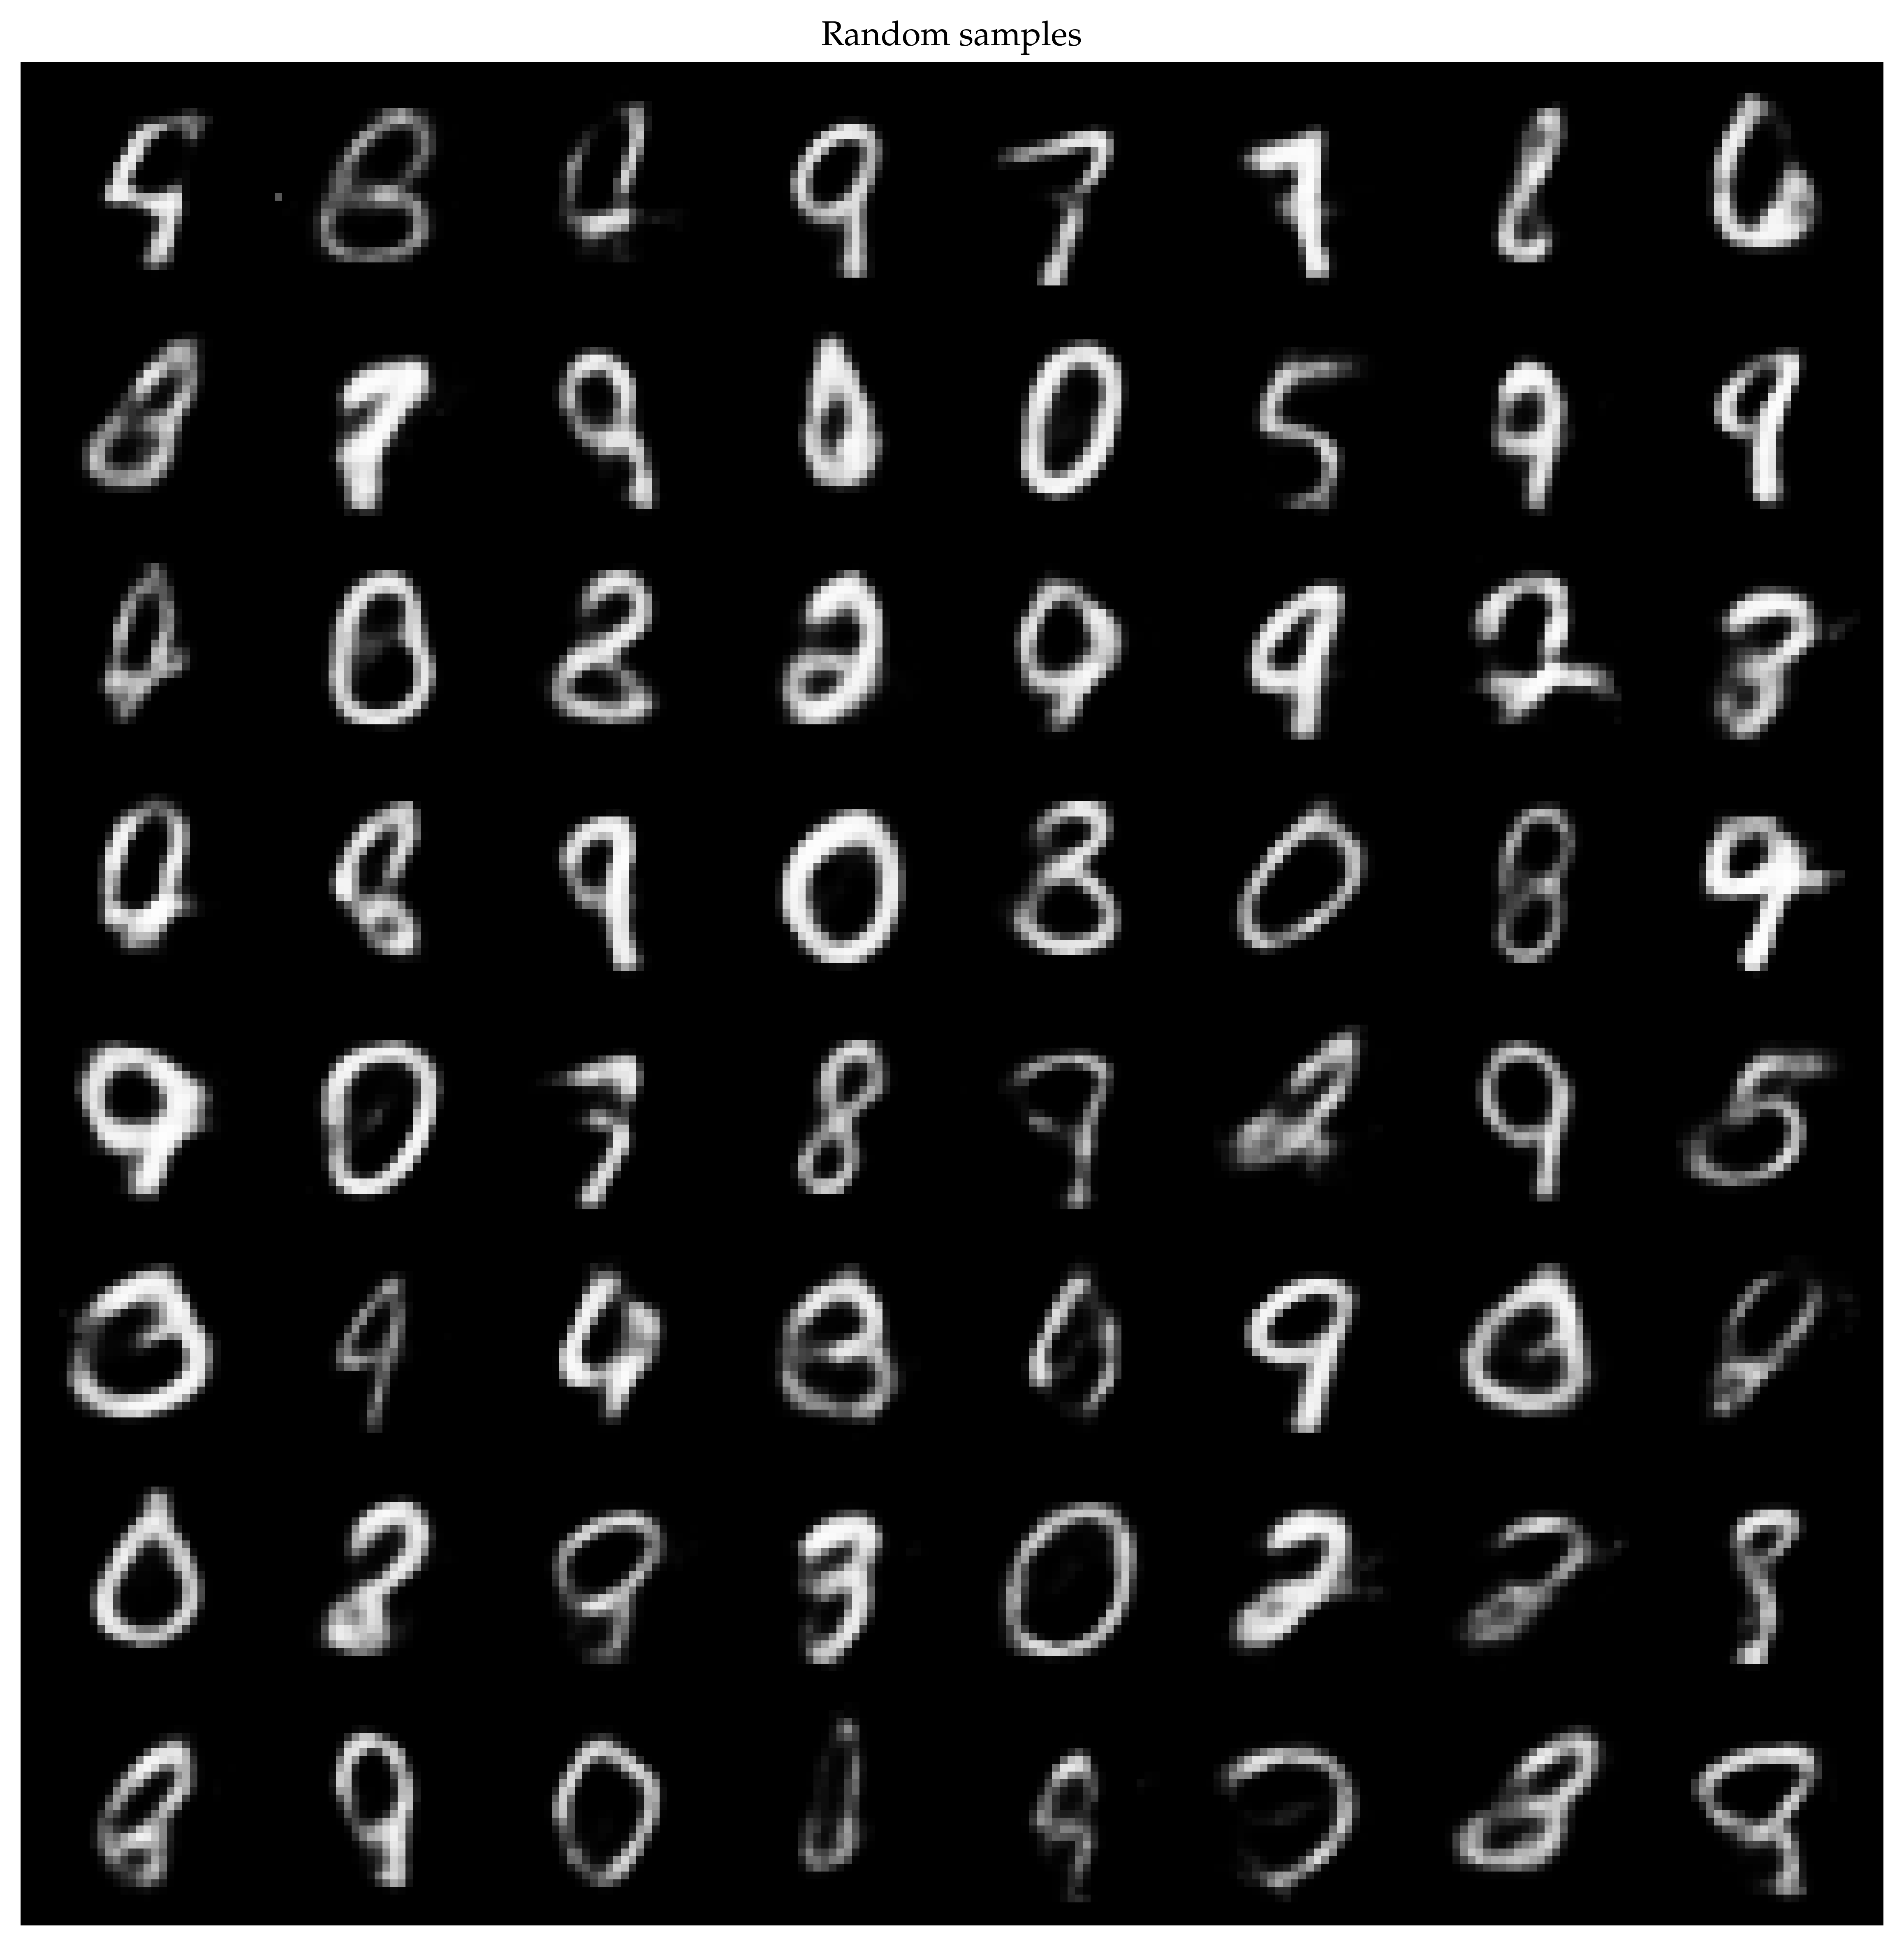

In [21]:
z_dim = vae.latent_dim
z_random = torch.randn(64, z_dim, device=device)
x_random = vae.decoder(z_random)[0]

show_image3 = make_grid(x_random.cpu(), nrow=8).permute(1,2,0)
plt.figure(figsize=(12,12), dpi=500)
plt.imshow(show_image3);
plt.title('Random samples')
plt.axis('off');